<a href="https://colab.research.google.com/github/vaghemanth/EDA/blob/main/Delhivery_EDA_Feature_Engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget "https://drive.google.com/uc?export=download&id=1_ALaX21syCSpRc3_VAeHQ6cxx6419wmp"  -O delhivery.csv

--2025-02-18 14:35:46--  https://drive.google.com/uc?export=download&id=1_ALaX21syCSpRc3_VAeHQ6cxx6419wmp
Resolving drive.google.com (drive.google.com)... 142.251.2.113, 142.251.2.102, 142.251.2.100, ...
Connecting to drive.google.com (drive.google.com)|142.251.2.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1_ALaX21syCSpRc3_VAeHQ6cxx6419wmp&export=download [following]
--2025-02-18 14:35:46--  https://drive.usercontent.google.com/download?id=1_ALaX21syCSpRc3_VAeHQ6cxx6419wmp&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 74.125.137.132, 2607:f8b0:4023:c03::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|74.125.137.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 55617130 (53M) [application/octet-stream]
Saving to: ‘delhivery.csv’

delhivery.csv       100%[===================>]  53.04M  54.9MB/s    i

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import warnings
warnings.filterwarnings('ignore')


In [ ]:
df=pd.read_csv("delhivery.csv")
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


## BASICS ##

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

In [ ]:
df.describe()

,start_scan_to_end_scan,cutoff_factor,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
count,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.00000,144867.000000
mean,961.262986,232.926567,234.073372,416.927527,213.868272,284.771297,2.120107,36.196111,18.507548,22.82902,2.218368
std,1037.012769,344.755577,344.990009,598.103621,308.011085,421.119294,1.715421,53.571158,14.775960,17.86066,4.847530
min,20.000000,9.000000,9.000045,9.000000,6.000000,9.008200,0.144000,-244.000000,0.000000,0.00000,-23.444444
25%,161.000000,22.000000,23.355874,51.000000,27.000000,29.914700,1.604264,20.000000,11.000000,12.07010,1.347826
50%,449.000000,66.000000,66.126571,132.000000,64.000000,78.525800,1.857143,29.000000,17.000000,23.51300,1.684211
75%,1634.000000,286.000000,286.708875,513.000000,257.000000,343.193250,2.213483,40.000000,22.000000,27.81325,2.250000
max,7898.000000,1927.000000,1927.447705,4532.000000,1686.000000,2326.199100,77.387097,3051.000000,1611.000000,2191.40370,574.250000


In [ ]:
df.columns

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'is_cutoff', 'cutoff_factor',
       'cutoff_timestamp', 'actual_distance_to_destination', 'actual_time',
       'osrm_time', 'osrm_distance', 'factor', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'segment_factor'],
      dtype='object')

In [ ]:
df.shape

(144867, 24)

In [ ]:
df.isna().sum()

,0
data,0
trip_creation_time,0
route_schedule_uuid,0
route_type,0
trip_uuid,0
source_center,0
source_name,293
destination_center,0
destination_name,261
od_start_time,0


In [ ]:
df["source_name"].fillna("other", inplace=True)
df["destination_name"].fillna("other", inplace=True)

## DATA TRANSFORMATION ##

**Column Profiling:**

- data - tells whether the data is testing or training data
- trip_creation_time – Timestamp of trip creation
- route_schedule_uuid – Unique Id for a particular route schedule
- route_type – Transportation type
- FTL – Full Truck Load: FTL shipments get to the destination sooner, as the truck is making no other pickups or drop-offs along the way
- Carting: Handling system consisting of small vehicles (carts)
- trip_uuid - Unique ID given to a particular trip (A trip may include different source and destination centers)
- source_center - Source ID of trip origin
- source_name - Source Name of trip origin
- destination_cente – Destination ID
- destination_name – Destination Name
- od_start_time – Trip start time
- od_end_time – Trip end time
- start_scan_to_end_scan – Time taken to deliver from source to destination
- is_cutoff – Unknown field
- cutoff_factor – Unknown field
- cutoff_timestamp – Unknown field
- actual_distance_to_destination – Distance in Kms between source and destination warehouse
- actual_time – Actual time taken to complete the delivery (Cumulative)
- osrm_time – An open-source routing engine time calculator which computes the shortest path between points in a given map (Includes usual traffic, distance through major and minor roads) and gives the time (Cumulative)
- osrm_distance – An open-source routing engine which computes the shortest path between points in a given map (Includes usual traffic, distance through major and minor roads) (Cumulative)
- factor – Unknown field
- segment_actual_time – This is a segment time. Time taken by the subset of the package delivery
- segment_osrm_time – This is the OSRM segment time. Time taken by the subset of the package delivery
- segment_osrm_distance – This is the OSRM distance. Distance covered by subset of the package delivery
- segment_factor – Unknown field



In [ ]:
columns_to_drop = ['is_cutoff', 'cutoff_factor', 'cutoff_timestamp', 'factor', 'segment_factor']
df = df.drop(columns_to_drop, axis=1)

In [ ]:
columns_with_time = ["trip_creation_time", "od_start_time", "od_end_time"]
for col in columns_with_time:
  df[col] = pd.to_datetime(df[col])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 19 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   data                            144867 non-null  object        
 1   trip_creation_time              144867 non-null  datetime64[ns]
 2   route_schedule_uuid             144867 non-null  object        
 3   route_type                      144867 non-null  object        
 4   trip_uuid                       144867 non-null  object        
 5   source_center                   144867 non-null  object        
 6   source_name                     144867 non-null  object        
 7   destination_center              144867 non-null  object        
 8   destination_name                144867 non-null  object        
 9   od_start_time                   144867 non-null  datetime64[ns]
 10  od_end_time                     144867 non-null  datetim

In [ ]:
df["destination_center"].unique()

array(['IND388620AAB', 'IND388320AAA', 'IND411033AAA', ...,
       'IND600004AAA', 'IND134203AAA', 'IND400701AAA'], dtype=object)

## DATA VIZ ##

<Axes: xlabel='trip_creation_time', ylabel='count'>

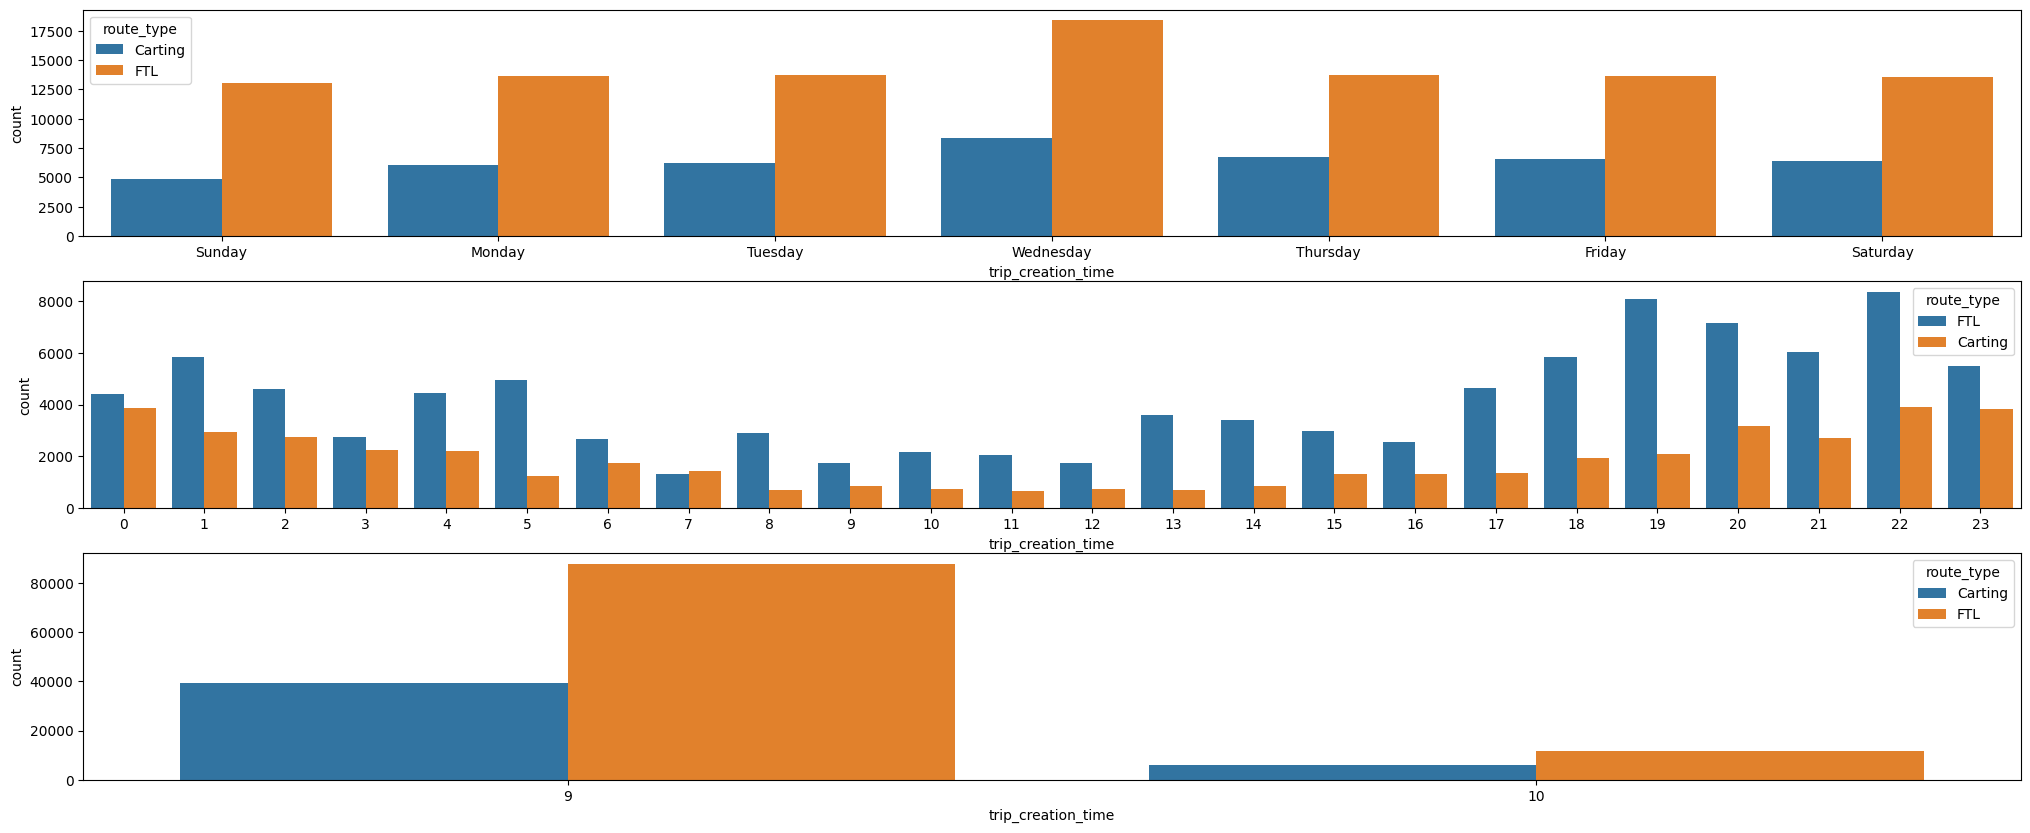

In [ ]:
plt.figure(figsize=(25,10))
hr_of_day = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
weekday = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]

plt.subplot(311)
sns.countplot(x=df['trip_creation_time'].dt.day_name(), data=df, order=weekday, hue=df.route_type)

plt.subplot(312)
sns.countplot(x=df['trip_creation_time'].dt.hour, data=df, order=hr_of_day,hue=df.route_type)
              #df['trip_creation_time'].dt.hour.value_counts().index)

plt.subplot(313)
sns.countplot(x=df['trip_creation_time'].dt.month, data=df, order=df['trip_creation_time'].dt.month.value_counts().index, hue=df.route_type)

In [ ]:
#hint1
df["trip_uuid"] = df["trip_uuid"].astype("string")
df["source_center"] = df["source_center"].astype("string")
df["destination_center"] = df["destination_center"].astype("string")

#stich all together as one ID
df["comb_id"] = df.apply(lambda x : x['trip_uuid'].replace("trip-", "ID_")+'_'+
                         x['source_center'].replace("IND", "")+'_'+
                         x['destination_center'].replace("IND", ""),axis=1)


In [ ]:
df["cumu_actual_distance_to_destination"] = df.groupby('comb_id')["actual_distance_to_destination"].cumsum()
df["cumu_segment_actual_time"] = df.groupby('comb_id')["segment_actual_time"].cumsum()
df["cumu_segment_osrm_time"] = df.groupby('comb_id')["segment_osrm_time"].cumsum()
df["cumu_segment_osrm_distance"] = df.groupby('comb_id')["segment_osrm_distance"].cumsum()

df.drop(["actual_distance_to_destination", "segment_actual_time","segment_osrm_time","segment_osrm_distance"], axis=1, inplace=True)


In [ ]:
df = df.groupby(['comb_id']).tail(1)
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_time,osrm_time,osrm_distance,comb_id,cumu_actual_distance_to_destination,cumu_segment_actual_time,cumu_segment_osrm_time,cumu_segment_osrm_distance
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,68.0,44.0,54.2181,ID_153741093647649320_388121AAA_388620AAB,132.513850,67.0,44.0,49.4772
9,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,102.0,45.0,53.2334,ID_153741093647649320_388620AAB_388320AAA,139.045383,100.0,44.0,53.2334
14,training,2018-09-23 06:42:06.021680,thanos::sroute:ff52ef7a-4d0d-4063-9bfe-cc21172...,FTL,trip-153768492602129387,IND421302AAG,Bhiwandi_Mankoli_HB (Maharashtra),IND411033AAA,Pune_Tathawde_H (Maharashtra),2018-09-23 06:42:06.021680,2018-09-23 11:44:28.365845,302.0,183.0,95.0,129.3519,ID_153768492602129387_421302AAG_411033AAA,328.874342,180.0,106.0,130.4089
16,training,2018-09-14 15:42:46.437249,thanos::sroute:a16bfa03-3462-4bce-9c82-5784c7d...,Carting,trip-153693976643699843,IND400011AAA,LowerParel_CP (Maharashtra),IND400072AAD,Mumbai_Chndivli_PC (Maharashtra),2018-09-14 15:42:46.437249,2018-09-14 17:31:45.368791,108.0,60.0,16.0,18.7941,ID_153693976643699843_400011AAA_400072AAD,25.787125,60.0,16.0,18.7941
18,training,2018-09-13 20:44:19.424489,thanos::sroute:76951383-1608-44e4-a284-46d92e8...,FTL,trip-153687145942424248,IND562132AAA,Bangalore_Nelmngla_H (Karnataka),IND560099AAB,Bengaluru_Bomsndra_HB (Karnataka),2018-09-13 20:44:19.424489,2018-09-13 23:59:56.061158,195.0,67.0,53.0,52.1256,ID_153687145942424248_562132AAA_560099AAB,63.441846,67.0,56.0,53.9310


## HYPOTHESIS TESTING ##

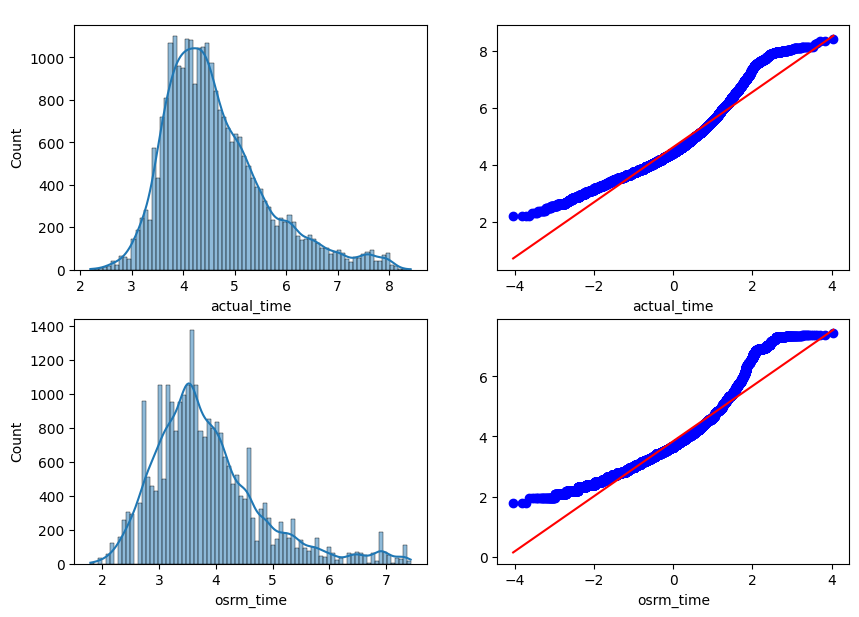

In [ ]:
#Do hypothesis testing/ visual analysis between actual_time aggregated value and OSRM time aggregated value
from scipy.stats import ttest_ind
#from statsmodels.api import qqplot
import scipy.stats as stats

plt.figure(figsize=(10, 7))

plt.subplot(221)
sns.histplot(np.log(df["actual_time"]), kde=True)

plt.subplot(222)
stats.probplot(np.log(df["actual_time"]), dist="norm", plot=plt)
plt.xlabel("actual_time")
plt.ylabel(" ")
plt.title(" ", fontsize=6)

plt.subplot(223)
sns.histplot(np.log(df["osrm_time"]), kde= True)

plt.subplot(224)
stats.probplot(np.log(df["osrm_time"]), dist="norm", plot=plt)
plt.xlabel("osrm_time")
plt.ylabel(" ")
plt.title(" ", fontsize=6)

plt.show()

In [ ]:
print(ttest_ind(df["actual_time"],df["osrm_time"]))

TtestResult(statistic=41.82845508363711, pvalue=0.0, df=52734.0)


Since p < 0.05, actual time abd osrm time are significantly different.

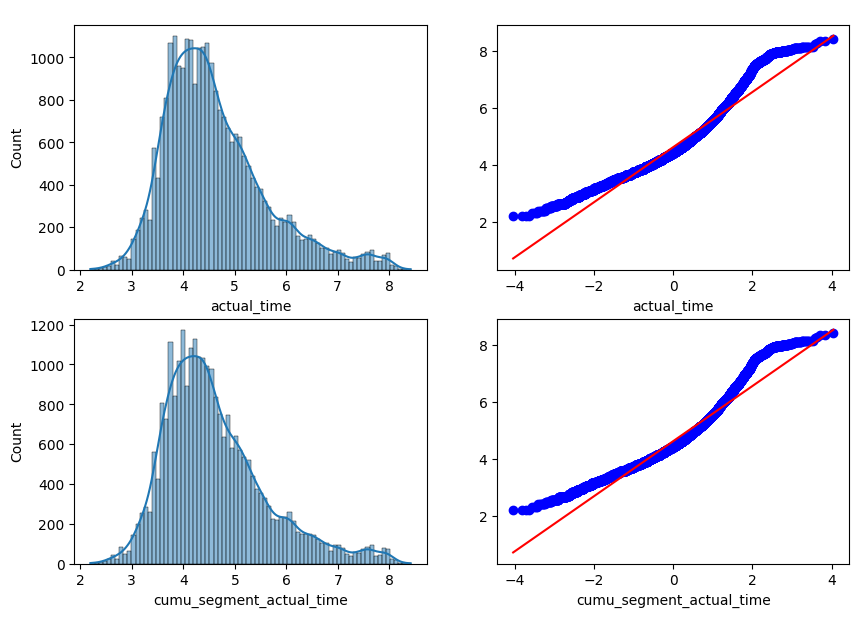

In [ ]:
#Do hypothesis testing/ visual analysis between actual_time aggregated value and segment actual time aggregated value (aggregated values are the values you’ll get after merging the rows on the basis of trip_uuid)
from scipy.stats import ttest_ind
#from statsmodels.api import qqplot
import scipy.stats as stats

plt.figure(figsize=(10, 7))

plt.subplot(221)
sns.histplot(np.log(df["actual_time"]), kde=True)

plt.subplot(222)
stats.probplot(np.log(df["actual_time"]), dist="norm", plot=plt)
plt.xlabel("actual_time")
plt.ylabel(" ")
plt.title(" ", fontsize=6)

plt.subplot(223)
sns.histplot(np.log(df["cumu_segment_actual_time"]), kde= True)

plt.subplot(224)
stats.probplot(np.log(df["cumu_segment_actual_time"]), dist="norm", plot=plt)
plt.xlabel("cumu_segment_actual_time")
plt.ylabel(" ")
plt.title(" ", fontsize=6)

plt.show()

In [ ]:
print(ttest_ind(df["actual_time"],df["cumu_segment_actual_time"]))

TtestResult(statistic=0.5476525068970126, pvalue=0.5839328464797933, df=52734.0)


Since p value is > 0.05, actual_time and cumu_segment_actual_time are similar statistically.

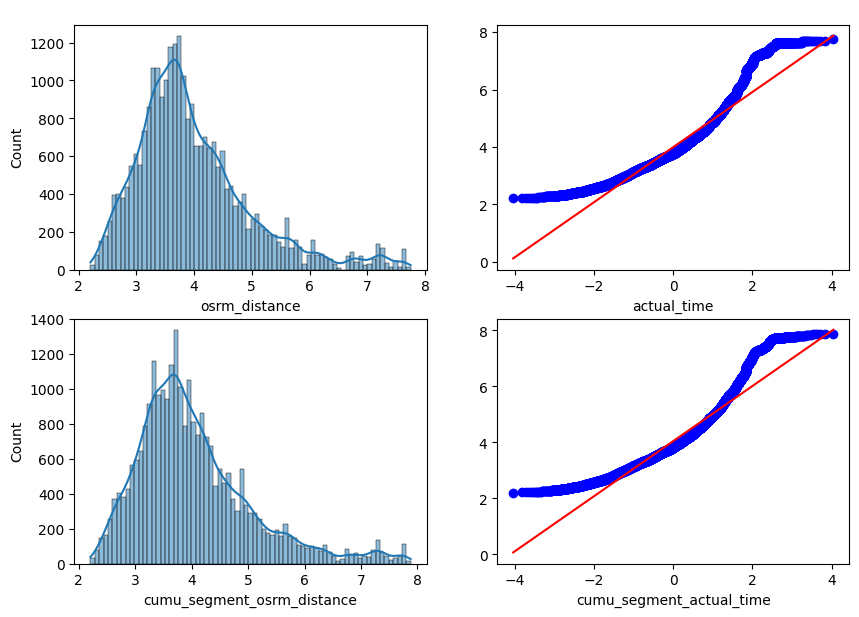

In [ ]:
#Do hypothesis testing/ visual analysis between osrm distance aggregated value and segment osrm distance aggregated value (aggregated values are the values you’ll get after merging the rows on the basis of trip_uuid)
from scipy.stats import ttest_ind
#from statsmodels.api import qqplot
import scipy.stats as stats

plt.figure(figsize=(10, 7))

plt.subplot(221)
sns.histplot(np.log(df["osrm_distance"]), kde=True)

plt.subplot(222)
stats.probplot(np.log(df["osrm_distance"]), dist="norm", plot=plt)
plt.xlabel("actual_time")
plt.ylabel(" ")
plt.title(" ", fontsize=6)

plt.subplot(223)
sns.histplot(np.log(df["cumu_segment_osrm_distance"]), kde= True)

plt.subplot(224)
stats.probplot(np.log(df["cumu_segment_osrm_distance"]), dist="norm", plot=plt)
plt.xlabel("cumu_segment_actual_time")
plt.ylabel(" ")
plt.title(" ", fontsize=6)

plt.show()

In [ ]:
print(ttest_ind(df["osrm_distance"],df["cumu_segment_osrm_distance"]))

TtestResult(statistic=-4.500595853737752, pvalue=6.790794407244852e-06, df=52734.0)


As p value is < 0.05, we can safely conclude that osrm_distance and cumu_segment_osrm_distance are significantly different.

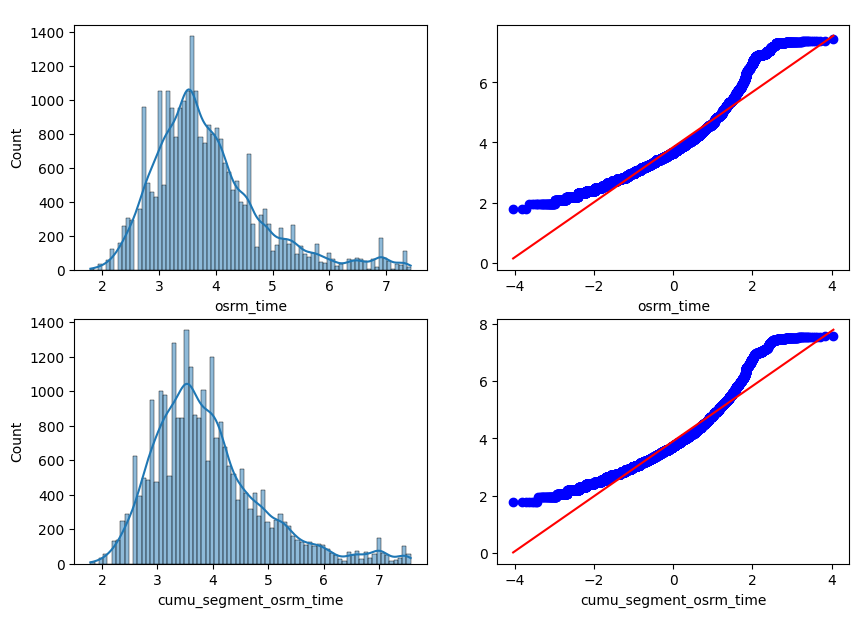

In [ ]:
#Do hypothesis testing/ visual analysis between osrm time aggregated value and segment osrm time aggregated value (aggregated values are the values you’ll get after merging the rows on the basis of trip_uuid)
from scipy.stats import ttest_ind
#from statsmodels.api import qqplot
import scipy.stats as stats

plt.figure(figsize=(10, 7))

plt.subplot(221)
sns.histplot(np.log(df["osrm_time"]), kde=True)

plt.subplot(222)
stats.probplot(np.log(df["osrm_time"]), dist="norm", plot=plt)
plt.xlabel("osrm_time")
plt.ylabel(" ")
plt.title(" ", fontsize=6)

plt.subplot(223)
sns.histplot(np.log(df["cumu_segment_osrm_time"]), kde= True)

plt.subplot(224)
stats.probplot(np.log(df["cumu_segment_osrm_time"]), dist="norm", plot=plt)
plt.xlabel("cumu_segment_osrm_time")
plt.ylabel(" ")
plt.title(" ", fontsize=6)

plt.show()

In [ ]:
print(ttest_ind(df["osrm_time"],df["cumu_segment_osrm_time"]))

TtestResult(statistic=-6.282322100204656, pvalue=3.361483126964898e-10, df=52734.0)


Since the value is less than significance level - 5%, we can confidently assume that osrm_time and cumu_segment_osrm_time are siginficantly different.

This indicates that there are multiple rows with the same uuid, pointing to the hypothesis that there are multiple "segments" in one trip.

In [ ]:
df['source_city'] = df["source_name"].str.extract(r'([^_]+)')
df['destination_city'] = df["destination_name"].str.extract(r'([^_]+)')
df['Source_to_Desti'] = df['source_city']+'_to_'+df['destination_city']
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,osrm_time,osrm_distance,comb_id,cumu_actual_distance_to_destination,cumu_segment_actual_time,cumu_segment_osrm_time,cumu_segment_osrm_distance,source_city,destination_city,Source_to_Desti
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,44.0,54.2181,ID_153741093647649320_388121AAA_388620AAB,132.513850,67.0,44.0,49.4772,Anand,Khambhat,Anand_to_Khambhat
9,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,...,45.0,53.2334,ID_153741093647649320_388620AAB_388320AAA,139.045383,100.0,44.0,53.2334,Khambhat,Anand,Khambhat_to_Anand
14,training,2018-09-23 06:42:06.021680,thanos::sroute:ff52ef7a-4d0d-4063-9bfe-cc21172...,FTL,trip-153768492602129387,IND421302AAG,Bhiwandi_Mankoli_HB (Maharashtra),IND411033AAA,Pune_Tathawde_H (Maharashtra),2018-09-23 06:42:06.021680,...,95.0,129.3519,ID_153768492602129387_421302AAG_411033AAA,328.874342,180.0,106.0,130.4089,Bhiwandi,Pune,Bhiwandi_to_Pune
16,training,2018-09-14 15:42:46.437249,thanos::sroute:a16bfa03-3462-4bce-9c82-5784c7d...,Carting,trip-153693976643699843,IND400011AAA,LowerParel_CP (Maharashtra),IND400072AAD,Mumbai_Chndivli_PC (Maharashtra),2018-09-14 15:42:46.437249,...,16.0,18.7941,ID_153693976643699843_400011AAA_400072AAD,25.787125,60.0,16.0,18.7941,LowerParel,Mumbai,LowerParel_to_Mumbai
18,training,2018-09-13 20:44:19.424489,thanos::sroute:76951383-1608-44e4-a284-46d92e8...,FTL,trip-153687145942424248,IND562132AAA,Bangalore_Nelmngla_H (Karnataka),IND560099AAB,Bengaluru_Bomsndra_HB (Karnataka),2018-09-13 20:44:19.424489,...,53.0,52.1256,ID_153687145942424248_562132AAA_560099AAB,63.441846,67.0,56.0,53.9310,Bangalore,Bengaluru,Bangalore_to_Bengaluru


In [ ]:
df['Source_to_Desti'].value_counts()[:10]


,count
Source_to_Desti,
Bengaluru_to_Bengaluru,565
Bangalore_to_Bengaluru,492
Bhiwandi_to_Mumbai,407
Bengaluru_to_Bangalore,356
Hyderabad_to_Hyderabad,316
Mumbai_to_Mumbai,286
Mumbai_to_Bhiwandi,282
Delhi_to_Gurgaon,248
Chennai_to_Chennai,246


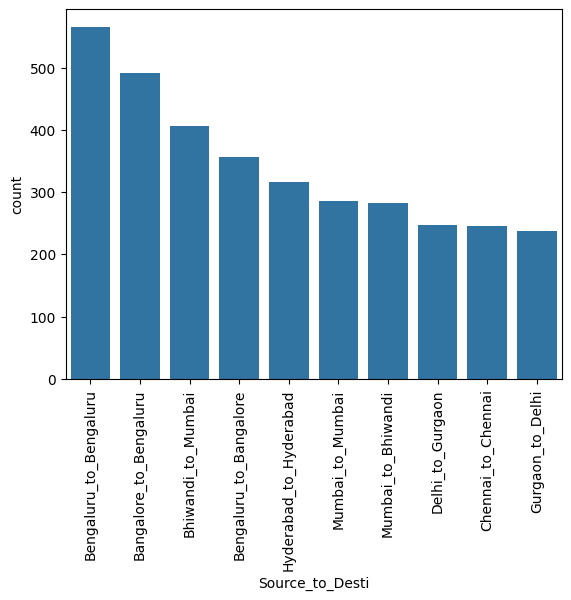

In [ ]:
#Top 10 Source to Destination routes
sns.countplot(x='Source_to_Desti', data=df[df['Source_to_Desti'].isin(df['Source_to_Desti'].value_counts().index[:10])],
              order=df['Source_to_Desti'].value_counts().index[:10])
plt.xticks(rotation=90)
plt.show()

In [ ]:
df.dtypes

,0
data,object
trip_creation_time,datetime64[ns]
route_schedule_uuid,object
route_type,object
trip_uuid,string[python]
source_center,string[python]
source_name,object
destination_center,string[python]
destination_name,object
od_start_time,datetime64[ns]


## OUTLIER TREATMENT##

In [ ]:
numeric_col = df.select_dtypes(include=['float64']).columns.tolist()
numeric_col

['start_scan_to_end_scan',
 'actual_time',
 'osrm_time',
 'osrm_distance',
 'cumu_actual_distance_to_destination',
 'cumu_segment_actual_time',
 'cumu_segment_osrm_time',
 'cumu_segment_osrm_distance']

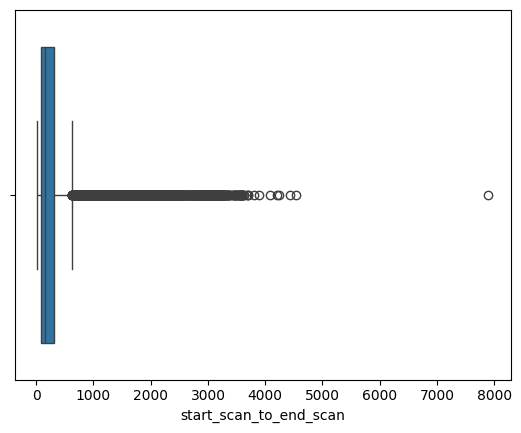

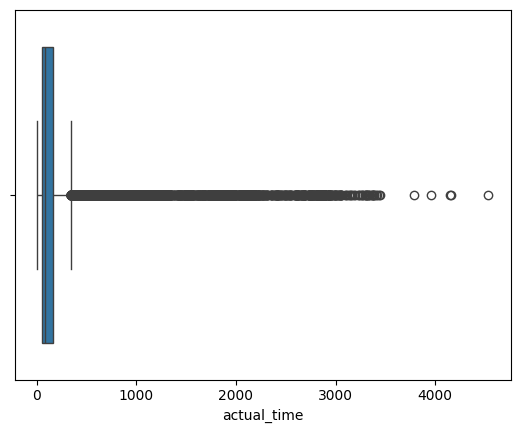

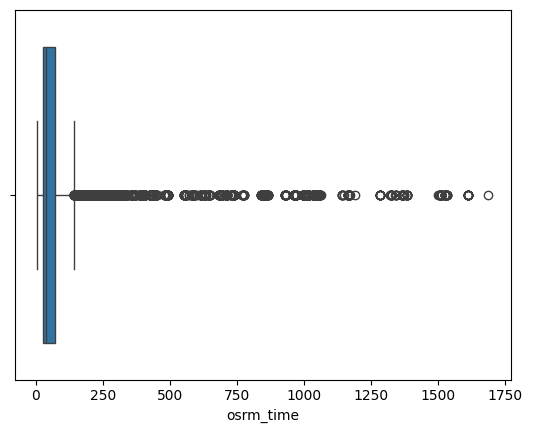

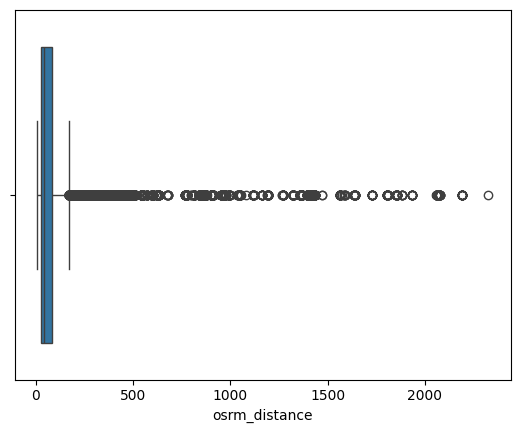

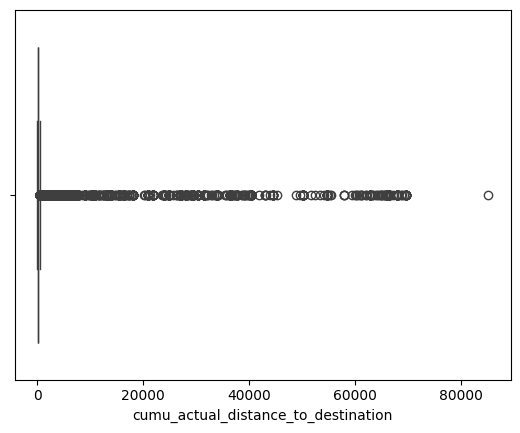

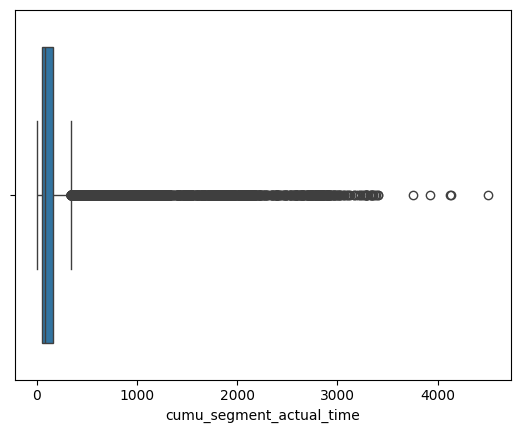

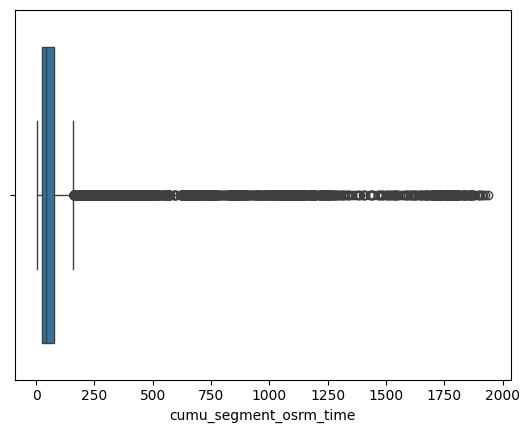

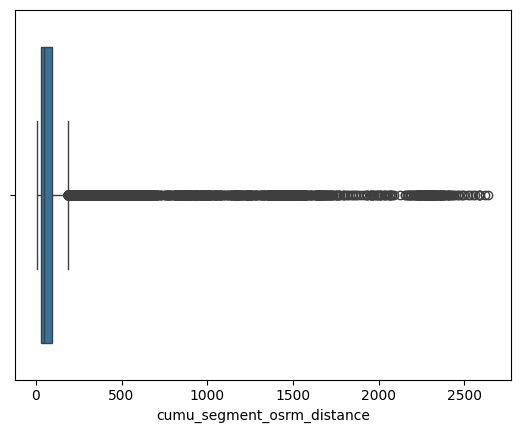

In [ ]:
for col in numeric_col:
  sns.boxplot(x = col, data=df)
  plt.show()

In [ ]:
Q1 = df[numeric_col].quantile(0.25)
Q3 = df[numeric_col].quantile(0.75)
IQR= Q3-Q1
df_iqr = df[~((df[numeric_col] < (Q1 - 1.5 * IQR)) | (df[numeric_col] > (Q3 + 1.5 * IQR))).any(axis=1)]
df_iqr.shape

(21207, 23)

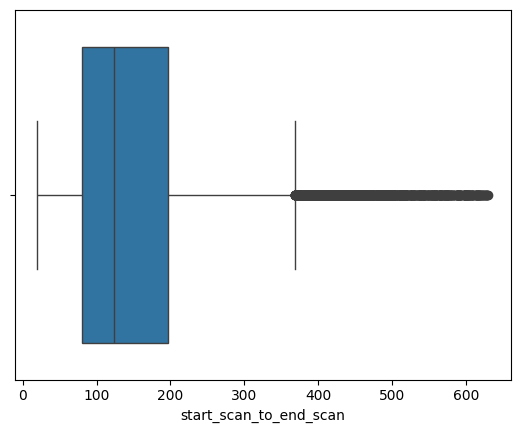

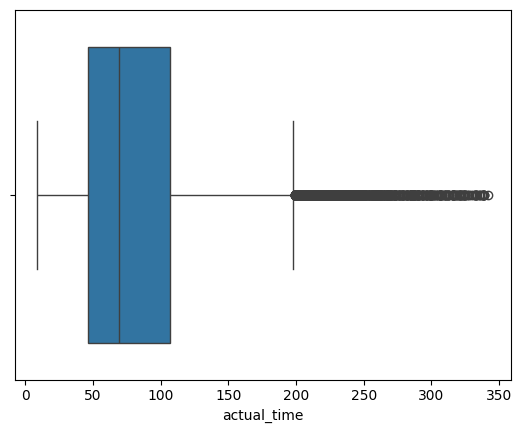

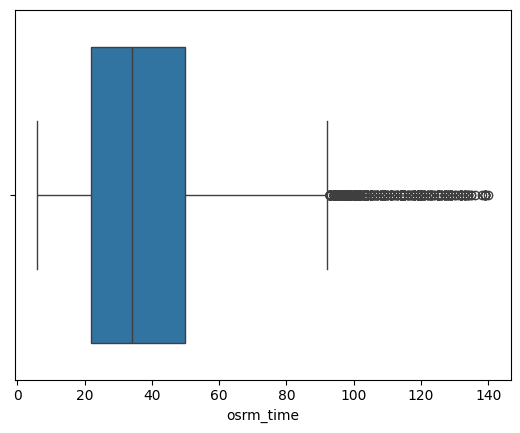

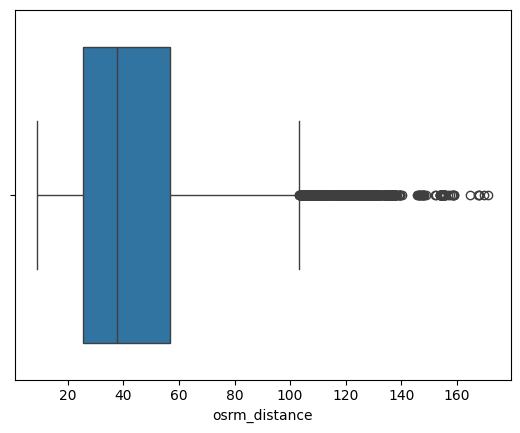

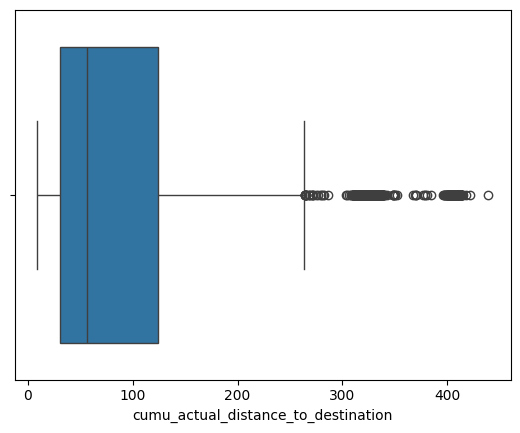

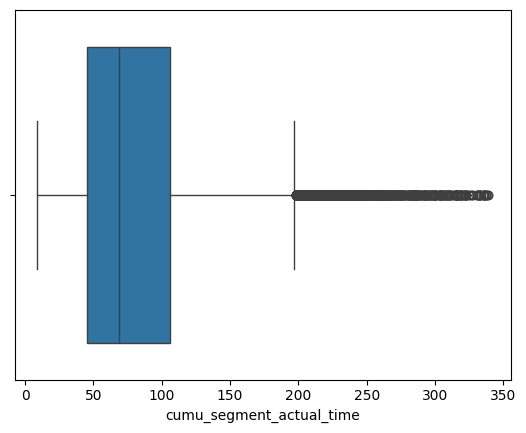

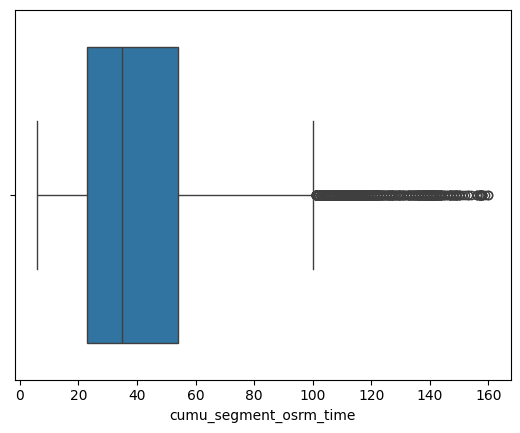

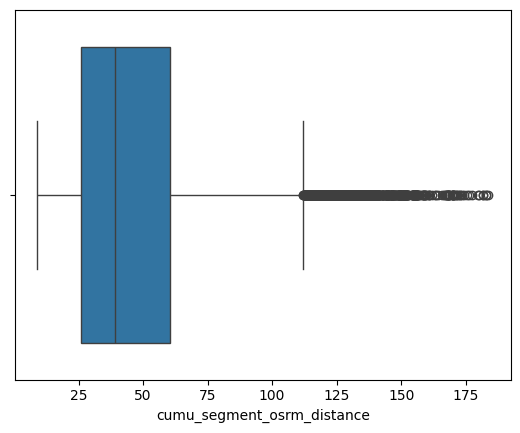

In [ ]:
for col in numeric_col:
  sns.boxplot(x = col, data=df_iqr)
  plt.show()

## LABEL ENCODING ##

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_en = LabelEncoder()
col = "route_type"
print(df_iqr[col].value_counts())

df_iqr[col] = label_en.fit_transform(df_iqr[col])
print(df_iqr[col].value_counts())

route_type
Carting    11662
FTL         9545
Name: count, dtype: int64
route_type
0    11662
1     9545
Name: count, dtype: int64


## Normalize/ Standardize ##

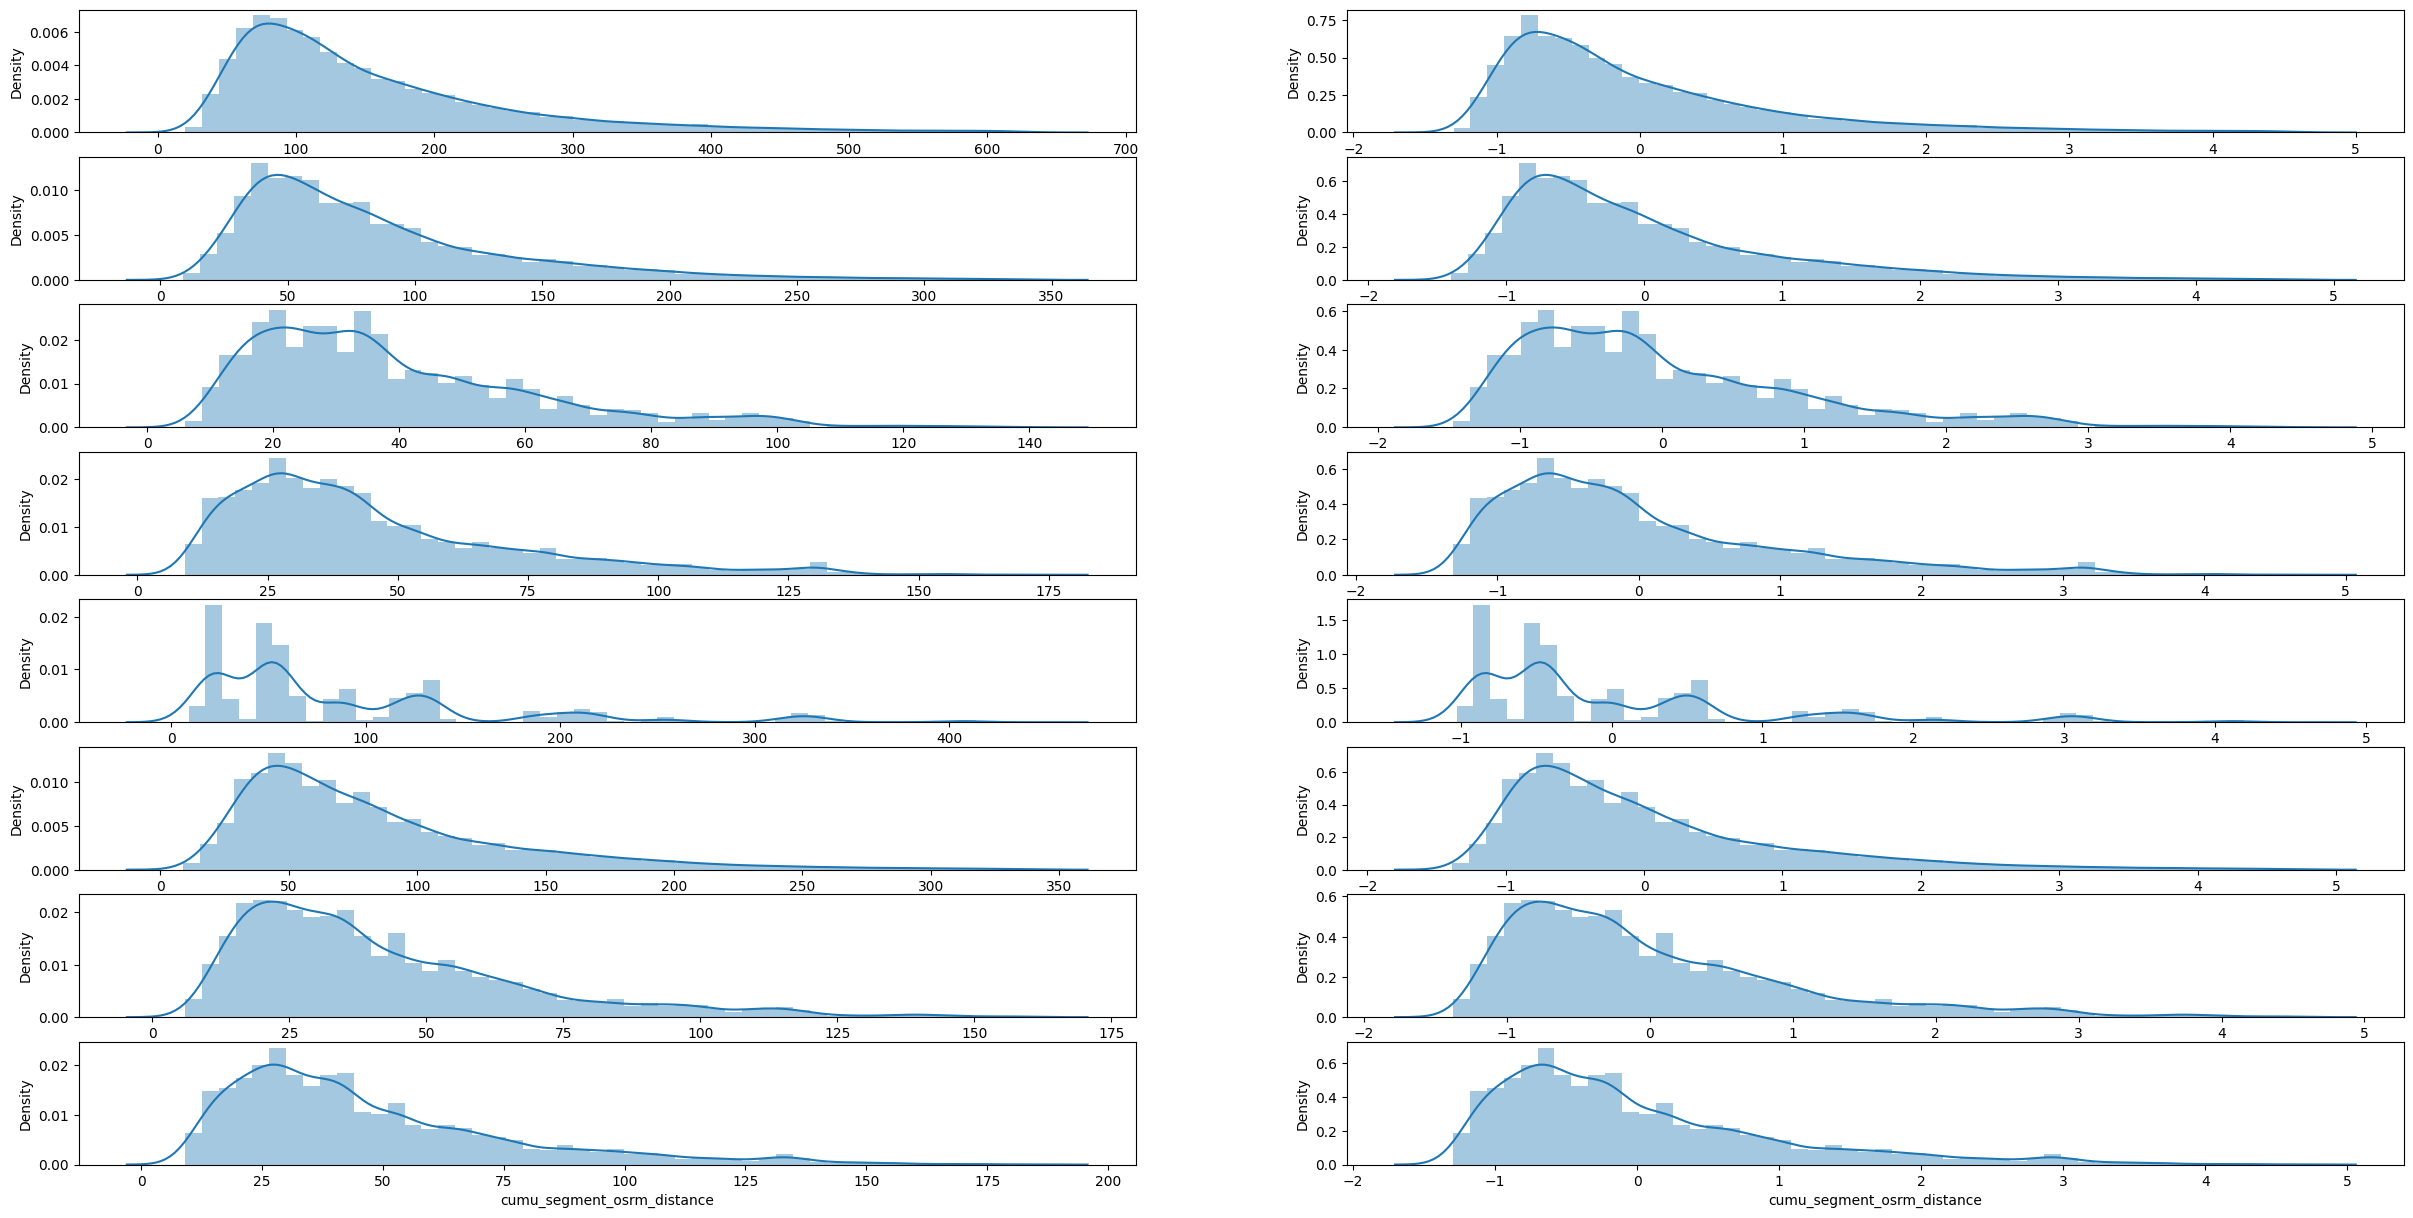

In [ ]:
from sklearn.preprocessing import StandardScaler
df_std = df_iqr.copy()

std_scaler = StandardScaler()
df_std[numeric_col] = std_scaler.fit_transform(df_iqr[numeric_col])

plt.figure(figsize=(30, 15))

num_col_len = len(numeric_col)
for i in range(num_col_len):
  plt.subplot(num_col_len, 2, 2*i +1)
  sns.distplot(df_iqr[numeric_col[i]])

  plt.subplot(num_col_len, 2, 2*i +2)
  sns.distplot(df_std[numeric_col[i]])

plt.show()